In [1]:
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [18]:
model = load_model('wbc_segmentation_model.h5')
test_img = cv2.imread('dataset/data1/001.bmp')

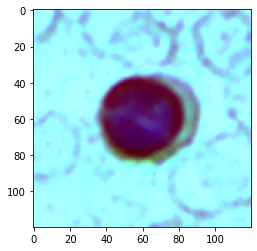

In [19]:
plt.imshow(test_img)

In [20]:
def prepare_img(image):
    image = cv2.resize(image,(128,128))
    image = image.reshape((1,128,128,3))
    return image

def predict_and_process(image):
    image = image.reshape((128,128,3))
    pred = model.predict(image.reshape(1,128,128,3))
    
    pred[pred>0.5] = 1
    pred[pred<0.6] = 0
    pred = pred[:,:,:,1].reshape((128,128))
    
    pred = np.uint8(pred)
    image = np.uint8(image)
    ret = cv2.bitwise_and(image, image, mask = pred)
    return ret,pred

In [27]:
def full_demo(image):
    image = prepare_img(image)
    ret = predict_and_process(image)
    #plt.imshow(ret)
    return ret

In [28]:
# DEMO TIME!

In [31]:
segmented_cell,pred = full_demo(test_img)

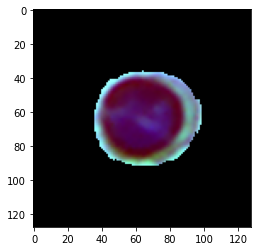

In [32]:
plt.imshow(segmented_cell)

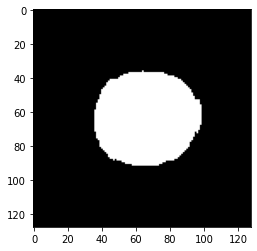

In [34]:
plt.imshow(pred,cmap='gray')